In [72]:
from fractions import Fraction


In [1]:
from rqc import utils
import numpy as np
from tqdm import tqdm
from rqc.APT import APT

In [2]:
import matplotlib.pyplot as plt

In [3]:
from importlib import reload

import rqc.APT
reload(rqc.APT)
from rqc.APT import APT

In [125]:
def run(inputs):
    L,seed, p_m,p_f  = inputs
    apt=APT(L=L,x0=Fraction(2**L-1,2**L),seed=seed,seed_C=None,seed_vec=None,store_op=False)
    for i in range(2*apt.L):
        apt.random_cicuit(p_m=p_m,p_f=p_f,even=True)
        apt.random_cicuit(p_m=p_m,p_f=p_f,even=False)
    OP=apt.order_parameter()
    TMI=apt.tripartite_mutual_information(np.arange(apt.L//4),np.arange(apt.L//4)+apt.L//4,np.arange(apt.L//4)+apt.L//2,selfaverage=True)
    return OP,TMI

In [113]:
run((8,0,0.1,1))

(0.3075797190915678, -0.17935728221722272)

In [126]:
# OP_map={}
# TMI_map={}
seed_list=np.arange(200)
p_m_list=np.linspace(0.05,0.25,11)
L_list=np.arange(8,20,4)
# L_list=np.arange(16,20,4)
for L in (L_list):
    OP_map[L]=np.zeros((p_m_list.shape[0],seed_list.shape[0]),dtype=float)
    TMI_map[L]=np.zeros((p_m_list.shape[0],seed_list.shape[0]),dtype=float)
    for p_m_idx,p_m in tqdm(enumerate(p_m_list)):
        for seed_idx,seed in enumerate(seed_list):
            # OP_map[L][p_m_idx,seed_idx],TMI_map[L][p_m_idx,seed_idx]=run((L,seed,p_m,p_m))
            OP_map[L][p_m_idx,seed_idx],TMI_map[L][p_m_idx,seed_idx]=run((L,seed,p_m,1))

11it [01:13,  6.72s/it]
11it [05:55, 32.29s/it]
11it [33:32, 182.97s/it]


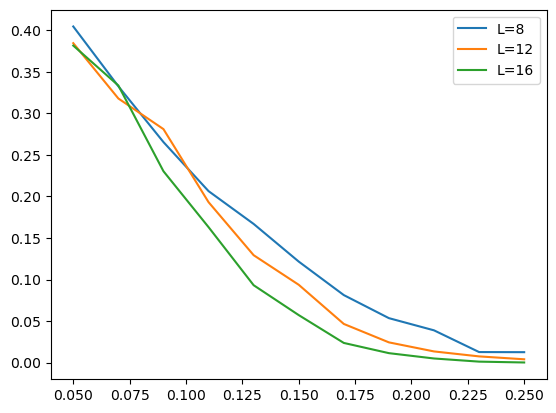

In [131]:
fig,ax=plt.subplots()
for i in OP_map.keys():
    ax.plot(p_m_list,OP_map[i].mean(axis=1),label=f'L={i}')
ax.legend()

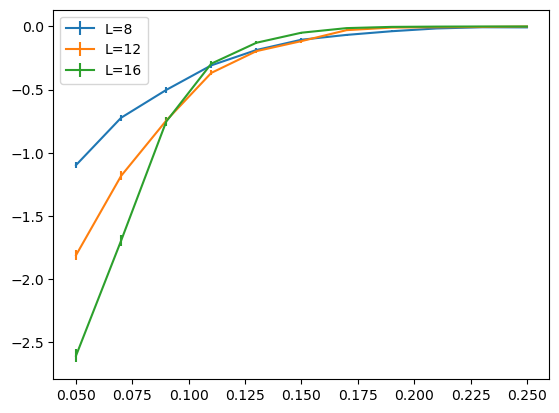

In [130]:
fig,ax=plt.subplots()
for i in TMI_map.keys():
        ax.errorbar(p_m_list,y=(TMI_map[i].mean(axis=1))/np.log(2),yerr=(TMI_map[i].std(axis=1)/np.sqrt(seed_list.shape[0])),label=f'L={i}')
    # ax.plot(p_m_list,np.log(-TMI_map[i].mean(axis=1)),label=f'L={i}')
ax.legend()
# ax.set_xlim(0.05,0.15)
# ax.set_ylim(-4,0)

In [25]:
res=[run((16,seed,0.05,1)) for seed in range(100)]

In [26]:
(np.array(res)[:,0]).mean()

0.3836154268272466

In [27]:
np.array(res)[:,1].mean(),(np.array(res)[:,1]).std()/np.sqrt((np.array(res)[:,1]).shape[0])

(-1.7919392255298745, 0.07118405303324324)

In [29]:
(np.array(res)[:,1]).mean()/np.log(2)

-2.5852218342463598

In [ ]:
np.array(res)[:,3].mean(),(np.array(res)[:,3]).std()/np.sqrt((np.array(res)[:,3]).shape[0])

0.0

In [242]:
OP_map[-1,:]

array([0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25,
       0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.25,
       0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25,
       0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.25, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.5 ,
       0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.25,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

In [132]:
def run_T(inputs):
    L,seed, p_m,p_f,t  = inputs
    apt=APT(L=L,x0=Fraction(2**L-1,2**L),seed=seed,seed_C=None,seed_vec=None,store_op=False)
    OP_list=[]
    for i in range(t):
        apt.random_cicuit(p_m=p_m,p_f=p_f,even=True)
        apt.random_cicuit(p_m=p_m,p_f=p_f,even=False)
        OP_list.append(apt.order_parameter())
        
    return OP_list

In [90]:
TMI_T_map

{}

In [133]:
OP_T_map={}
seed_list=np.arange(200)
L_list=np.arange(8,20,4)
# L_list=np.arange(16,20,4)
for L in (L_list):
    t=15*L
    OP_T_map[L]=np.zeros((seed_list.shape[0],t),dtype=float)
    for seed_idx,seed in tqdm(enumerate(seed_list)):
        OP_T_map[L][seed_idx]=run_T((L,seed,0.09085,1,t))

200it [00:55,  3.64it/s]
200it [03:08,  1.06it/s]
200it [12:17,  3.69s/it]


Text(0.5, 0, '$t/L^z$')

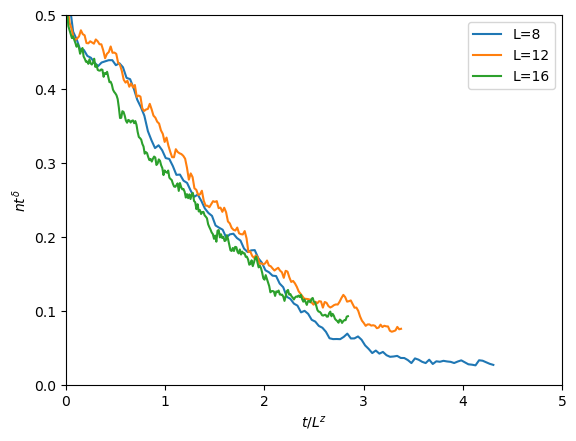

In [136]:
z=1.6
delta=0.16
fig,ax=plt.subplots()
for L in OP_T_map.keys():
    t_list=np.arange(1,OP_T_map[L].shape[1]+1)
    ax.plot(t_list/L**z,t_list**delta*OP_T_map[L].mean(axis=0),label=f'L={L}')
ax.legend()
ax.set_xlim(0,5)
ax.set_ylim(0,.5)
ax.set_ylabel(r'$nt^\delta$')
ax.set_xlabel(r'$t/L^z$')   

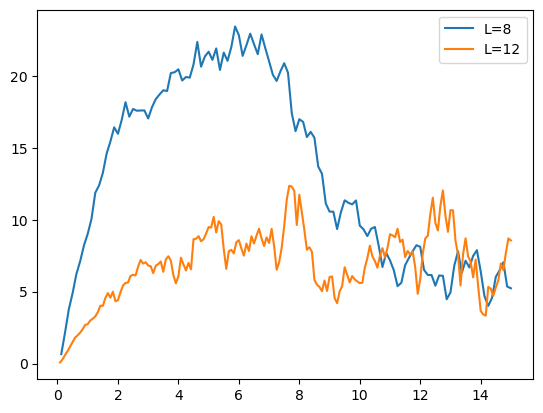

In [105]:
z=1
delta=1
fig,ax=plt.subplots()
for L in S_T_map.keys():
    t_list=np.arange(1,S_T_map[L].shape[1]+1)
    ax.plot(t_list/L**z,t_list**delta*S_T_map[L].mean(axis=0),label=f'L={L}')
ax.legend()
# ax.set_xlim(0,5)
# ax.set_ylim(0,.5)

In [74]:
apt1=APT(L=4,x0=Fraction(2**4-1,2**4),seed=0,seed_C=2,seed_vec=2,store_op=True)
# for i in range(apt1.L):
#     apt1.random_cicuit(0.1,1,even=True)
#     apt1.random_cicuit(0.1,1,even=False)

In [76]:
apt1.vec

array([[[[0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j]],

        [[0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j]]],


       [[[0.+0.j, 0.+0.j],
         [0.+0.j, 0.+0.j]],

        [[0.+0.j, 0.+0.j],
         [0.+0.j, 1.+0.j]]]])

In [217]:
apt1.order_parameter()

(0.354078576391018+0j)

In [214]:
apt.op_history

[[0,
  array([[[[ 1.        +0.j        ,  0.        +0.j        ],
           [ 0.        +0.j        ,  0.        +0.j        ]],
  
          [[ 0.        +0.j        ,  0.19648596+0.16723249j],
           [ 0.79509854+0.08047076j, -0.05882505+0.53973043j]]],
  
  
         [[[ 0.        +0.j        , -0.74092538-0.41871964j],
           [ 0.32465862-0.24462438j, -0.3231795 -0.07755089j]],
  
          [[ 0.        +0.j        , -0.30529108+0.34048106j],
           [ 0.37175065+0.240624j  ,  0.57375669-0.51533951j]]]])],
 [2,
  array([[[[ 1.        +0.j        ,  0.        +0.j        ],
           [ 0.        +0.j        ,  0.        +0.j        ]],
  
          [[ 0.        +0.j        , -0.19034658-0.10277738j],
           [-0.02590874+0.11395722j,  0.94689631-0.20720728j]]],
  
  
         [[[ 0.        +0.j        , -0.06709234+0.51556337j],
           [ 0.51808344-0.64875246j,  0.16104532+0.12027983j]],
  
          [[ 0.        +0.j        , -0.66000117+0.49728914j],
        

In [215]:
apt1.op_history

[[0,
  array([[[[ 1.        +0.j        ,  0.        +0.j        ],
           [ 0.        +0.j        ,  0.        +0.j        ]],
  
          [[ 0.        +0.j        ,  0.0739988 -0.21677594j],
           [-0.51971706+0.43515569j, -0.56690521-0.40827021j]]],
  
  
         [[[ 0.        +0.j        , -0.95563302-0.12870743j],
           [-0.19718674-0.1634919j ,  0.02506838-0.06292288j]],
  
          [[ 0.        +0.j        , -0.12737619-0.03882785j],
           [ 0.44053973+0.52994928j,  0.41700573-0.5774534j ]]]])],
 [2,
  array([[[[ 1.        +0.j        ,  0.        +0.j        ],
           [ 0.        +0.j        ,  0.        +0.j        ]],
  
          [[ 0.        +0.j        ,  0.05679002-0.73364945j],
           [-0.04023658-0.63883338j,  0.06353141+0.21158939j]]],
  
  
         [[[ 0.        +0.j        ,  0.08419694+0.37678213j],
           [-0.14719889-0.10323472j,  0.23094014+0.87480731j]],
  
          [[ 0.        +0.j        , -0.45258939+0.32348466j],
        

In [213]:
for idx,(a,a1) in enumerate(zip(apt.op_history,apt1.op_history)):
    if isinstance(a[1],np.ndarray) and isinstance(a1[1],np.ndarray):
        if a[0] != a1[0]:
            print(f'Different index for unitary at {idx}')
        if not np.allclose(a[1],a1[1]):
            print(f'Different unitary at {idx}')
    else:
        if isinstance(a[1],np.ndarray) or isinstance(a[1],np.ndarray):
            print(f'Different operation at {idx}') 
        if not a == a1:
            print(f'Different measurment at {idx}',a,'<>',a1)



Different unitary at 0
Different unitary at 1
Different measurment at 2 [2, 1, 'X'] <> [1, array([[[[ 1.        +0.j        ,  0.        +0.j        ],
         [ 0.        +0.j        ,  0.        +0.j        ]],

        [[ 0.        +0.j        ,  0.12848382+0.59684551j],
         [-0.04033964-0.03730928j, -0.02074953-0.78982121j]]],


       [[[ 0.        +0.j        , -0.57068603+0.08122532j],
         [ 0.51343943-0.40411089j, -0.49003355-0.02571703j]],

        [[ 0.        +0.j        , -0.12428809+0.52871517j],
         [ 0.22430987+0.72093006j, -0.14483488+0.33761003j]]]])]
Different index for unitary at 3
Different unitary at 3
Different operation at 4
Different measurment at 4 [3, array([[[[ 1.        +0.j        ,  0.        +0.j        ],
         [ 0.        +0.j        ,  0.        +0.j        ]],

        [[ 0.        +0.j        , -0.15404379-0.80912993j],
         [ 0.08184746+0.40916009j, -0.20565166+0.324308j  ]]],


       [[[ 0.        +0.j        , -0.48200139-0

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
a

[2, 1]

In [138]:
apt.vec

array([[[[ 0.56422116-0.10790331j, -0.25409574+0.0316278j ],
         [-0.07548876+0.07413723j, -0.17351858-0.03721281j]],

        [[ 0.08231458-0.02294691j,  0.10815432+0.09404981j],
         [ 0.05081723-0.05801394j,  0.12815807+0.01756341j]]],


       [[[-0.16872102-0.01444957j, -0.37079933+0.10908974j],
         [-0.15463151+0.11540343j, -0.22831561+0.25143312j]],

        [[ 0.15438017-0.02122675j,  0.25958085-0.0886376j ],
         [ 0.10608726-0.09233494j,  0.1522095 -0.19523745j]]]])

In [159]:
apt1.op_history[1][1] == apt.op_history[1][1]

array([[[[ True,  True],
         [ True,  True]],

        [[ True,  True],
         [ True,  True]]],


       [[[ True,  True],
         [ True,  True]],

        [[ True,  True],
         [ True,  True]]]])

In [166]:
apt1.op_history[0]

[[0, 1],
 array([[[[ 1.        +0.j        ,  0.        +0.j        ],
          [ 0.        +0.j        ,  0.        +0.j        ]],
 
         [[ 0.        +0.j        ,  0.19648596+0.16723249j],
          [ 0.79509854+0.08047076j, -0.05882505+0.53973043j]]],
 
 
        [[[ 0.        +0.j        , -0.74092538-0.41871964j],
          [ 0.32465862-0.24462438j, -0.3231795 -0.07755089j]],
 
         [[ 0.        +0.j        , -0.30529108+0.34048106j],
          [ 0.37175065+0.240624j  ,  0.57375669-0.51533951j]]]])]

In [167]:
apt1.op_history[2]

[2, 1]

In [164]:
apt.op_history

[[[0, 1],
  array([[[[ 1.        +0.j        ,  0.        +0.j        ],
           [ 0.        +0.j        ,  0.        +0.j        ]],
  
          [[ 0.        +0.j        ,  0.19648596+0.16723249j],
           [ 0.79509854+0.08047076j, -0.05882505+0.53973043j]]],
  
  
         [[[ 0.        +0.j        , -0.74092538-0.41871964j],
           [ 0.32465862-0.24462438j, -0.3231795 -0.07755089j]],
  
          [[ 0.        +0.j        , -0.30529108+0.34048106j],
           [ 0.37175065+0.240624j  ,  0.57375669-0.51533951j]]]])],
 [[2, 3],
  array([[[[ 1.        +0.j        ,  0.        +0.j        ],
           [ 0.        +0.j        ,  0.        +0.j        ]],
  
          [[ 0.        +0.j        , -0.19034658-0.10277738j],
           [-0.02590874+0.11395722j,  0.94689631-0.20720728j]]],
  
  
         [[[ 0.        +0.j        , -0.06709234+0.51556337j],
           [ 0.51808344-0.64875246j,  0.16104532+0.12027983j]],
  
          [[ 0.        +0.j        , -0.66000117+0.49728914j]

In [123]:
apt.order_parameter()

(0.5141783019458964+0j)

In [93]:
np.sqrt(apt.vec.flatten()@apt.vec.flatten().conj())

(0.79916033324564+0j)

In [90]:
np.linalg.norm(apt.vec)

0.79916033324564

In [80]:
apt.unitary_layer(even=True)
apt.unitary_layer(even=False)

In [84]:
apt.inner_prob(pos=0,n=0)

array(0.64816707+0.j)

In [82]:
apt.vec.flatten()

array([ 0.        +0.j        ,  0.03507096+0.05584743j,
       -0.44048348-0.03213747j,  0.0234354 -0.03204733j,
       -0.41407927+0.13979902j,  0.00907059-0.03822592j,
       -0.35979512+0.35091422j, -0.00960911-0.04414576j,
        0.00997744-0.39437331j,  0.05476803+0.04760256j,
       -0.22282916+0.08218739j,  0.01443966-0.04123077j,
       -0.17167712+0.16050696j, -0.00265963-0.04314801j,
       -0.09816373+0.25181257j, -0.02421969-0.04341446j])

In [83]:
apt.vec.flatten()[:8].T.conj()@apt.vec.flatten()[:8]

(0.6481670748339009+0j)

In [57]:
apt.vec.flatten()[2:].T.conj()@apt.vec.flatten()[2:]

(0.9724426600490486+0j)

In [320]:
uu=utils.U(3)

In [321]:
uu.conj().T@uu

array([[ 1.00000000e+00+0.00000000e+00j, -9.71445147e-17+1.24900090e-16j,
         8.32667268e-17+5.55111512e-17j],
       [-9.71445147e-17-1.24900090e-16j,  1.00000000e+00+0.00000000e+00j,
        -1.80411242e-16-4.16333634e-17j],
       [ 8.32667268e-17-5.55111512e-17j, -1.80411242e-16+4.16333634e-17j,
         1.00000000e+00+0.00000000e+00j]])

In [322]:
apt.U3

array([[[[ 1.        +0.j        ,  0.        +0.j        ],
         [ 0.        +0.j        ,  0.        +0.j        ]],

        [[ 0.        +0.j        , -0.19034658-0.10277738j],
         [-0.02590874+0.11395722j,  0.94689631-0.20720728j]]],


       [[[ 0.        +0.j        , -0.06709234+0.51556337j],
         [ 0.51808344-0.64875246j,  0.16104532+0.12027983j]],

        [[ 0.        +0.j        , -0.66000117+0.49728914j],
         [-0.54395131+0.03419442j, -0.07087193+0.12258408j]]]])

In [324]:
np.round(apt.U3.reshape((4,4)).T.conj()@apt.U3.reshape((4,4)),3)

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j, -0.+0.j],
       [ 0.+0.j,  0.-0.j,  1.+0.j, -0.-0.j],
       [ 0.+0.j, -0.-0.j, -0.+0.j,  1.+0.j]])

In [312]:
apt.U3.T.conj()@apt.U3

array([[[[ 1.        +0.j        ,  0.        +0.j        ],
         [ 0.        +0.j        , -0.67832844+0.24598695j]],

        [[ 0.        +0.j        ,  0.        +0.j        ],
         [ 0.03234537+0.13392726j,  0.01048387-0.0645252j ]]],


       [[[ 0.        +0.j        ,  0.02771199-0.00840687j],
         [ 0.        +0.j        , -0.11295695-0.02553657j]],

        [[-0.56566482-0.23938444j,  0.31384514-0.69315137j],
         [ 0.01345849+0.51111159j,  0.5397395 -0.06063556j]]]])

In [302]:
apt.vec.flatten()

array([ 1.        +0.j        , -0.01377086+0.16164286j,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.03713392+0.17460315j,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ])

In [280]:
apt.measure_feedback_layer(pos=[0,1],n=[1,1],feedback=[True,False])

In [281]:
apt.vec.flatten()

array([ 0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.03264523+0.02512174j, -0.13441489-0.10086483j,
        0.05049129+0.04198142j, -0.02636522-0.26995747j,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ,
        0.        +0.j        ,  0.        +0.j        ])

In [282]:
apt.rng_C.random(2)

array([0.42271691, 0.58950206])

In [ ]:
apt.measure_feedback_layer()

In [245]:
apt.X(n=-1)

In [212]:
apt.P(n=[1],pos=[0])

In [246]:
apt.vec.flatten()

array([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [135]:
apt.unitary(1)

In [136]:
apt.vec.flatten()

array([0.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 5.+0.j, 0.+0.j, 8.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [125]:
apt.U3.reshape((4,4))

array([[ 1.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.19648596+0.16723249j,
         0.79509854+0.08047076j, -0.05882505+0.53973043j],
       [ 0.        +0.j        , -0.74092538-0.41871964j,
         0.32465862-0.24462438j, -0.3231795 -0.07755089j],
       [ 0.        +0.j        , -0.30529108+0.34048106j,
         0.37175065+0.240624j  ,  0.57375669-0.51533951j]])

In [122]:
vec=apt.vec.reshape((4,2))


In [126]:
(apt.U3.reshape((4,4))@vec).flatten()

array([ 0.        +0.j        ,  0.        +0.j        ,
        0.19648596+0.16723249j,  0.        +0.j        ,
       -0.74092538-0.41871964j,  0.        +0.j        ,
       -0.30529108+0.34048106j,  0.        +0.j        ])

In [127]:
apt.vec.flatten()

array([ 0.        +0.j        ,  0.        +0.j        ,
        0.19648596+0.16723249j,  0.        +0.j        ,
       -0.74092538-0.41871964j,  0.        +0.j        ,
       -0.30529108+0.34048106j,  0.        +0.j        ])

In [67]:
uu=apt.generate_U3(apt.rng)

In [70]:
apt.U3.reshape((4,4))[1:,1:]-uu

array([[0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j]])

In [25]:
np.around(apt.U3.reshape((4,4)),3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [ ]:
contract(self.vec)

In [11]:
apt.sites

array([0, 1, 2, 3])

In [27]:
apt.unitary(0)

array([[[[ 0.        +0.j        ,  0.        +0.j        ],
         [ 0.        +0.j        ,  0.        +0.j        ]],

        [[-0.74092538-0.41871964j,  0.        +0.j        ],
         [ 0.        +0.j        ,  0.        +0.j        ]]],


       [[[ 0.32465862-0.24462438j,  0.        +0.j        ],
         [ 0.        +0.j        ,  0.        +0.j        ]],

        [[-0.3231795 -0.07755089j,  0.        +0.j        ],
         [ 0.        +0.j        ,  0.        +0.j        ]]]])

In [29]:
uu=apt.U3.reshape((4,4))